In [71]:
import pandas as pd
import numpy as np

In [8]:
link1 = "./BD/name.basics.tsv.gz"
# link2 = "./BD/title.akas.tsv.gz"
# link3 = "./BD/title.basics.tsv.gz"
# link4 = "./BD/title.crew.tsv.gz"
# link5 = "./BD/title.episode.tsv.gz"
# link6 = "./BD/title.principals.tsv.gz"
# link7 = "./BD/title.ratings.tsv.gz"
# link8 = "./BD/tmdb_full.csv"
df_basic_name = pd.read_csv(link1, sep = "\t", compression = "gzip", nrows = 1000)
# df_t_akas = pd.read_csv(link2, sep = "\t", compression = "gzip", nrows = 1000)
# df_t_basics = pd.read_csv(link3, sep = "\t", compression = "gzip", nrows = 1000)
# df_t_crew = pd.read_csv(link4, sep = "\t", compression = "gzip", nrows = 1000)
# df_t_episode = pd.read_csv(link5, sep = "\t", compression = "gzip", nrows = 1000)
# df_t_principals = pd.read_csv(link6, sep = "\t", compression = "gzip", nrows = 1000)
# df_t_ratings = pd.read_csv(link7, sep = "\t", compression = "gzip", nrows = 1000)
# df_tmdb = pd.read_csv(link8, nrows = 1000)

In [63]:
link4 = "./BD/title.crew.tsv.gz"
df_t_crew = pd.read_csv(link4, sep = "\t", compression = "gzip", nrows = 1000)

In [ ]:
df_t_crew
df_t_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tconst     1000 non-null   object
 1   directors  1000 non-null   object
 2   writers    1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [57]:
df_t_crew.isnull().sum()

tconst       0
directors    0
writers      0
dtype: int64

In [ ]:
#Etape 1 : transformer les valeurs en liste : 
df_t_crew['directors'] = df_t_crew['directors'].apply(lambda x: x.strip().split(',') )
df_t_crew['writers'] = df_t_crew['writers'].apply(lambda x: x.strip().split(',') )

In [67]:
df_t_crew

,tconst,directors,writers
0,tt0000001,[nm0005690],[\N]
1,tt0000002,[nm0721526],[\N]
2,tt0000003,[nm0721526],[\N]
3,tt0000004,[nm0721526],[\N]
4,tt0000005,[nm0005690],[\N]
...,...,...,...
995,tt0001007,[nm0185426],[\N]
996,tt0001008,[nm0205986],"[nm0205986, nm0878494]"
997,tt0001009,[nm0085865],[\N]
998,tt0001010,[nm0185426],[\N]


In [ ]:
# Etape 2 (en second temps): eclater la liste en plusieurs lignes, PS je constate que cela s'applique uniquement sur une des colonnes ici c'est le dernier code Writers, 
# ==> attribuer la valeur dans DF pour pouvoir exécuter les deux explode()
# df_t_crew = df_t_crew.explode('directors')
# df_t_crew = df_t_crew.explode('writers')


In [ ]:
import numpy as np
# df_t_crew['directors'] = df_t_crew['directors'].replace('\\N', np.nan)
# df_t_crew['writers'] = df_t_crew['writers'].replace('\\N', np.nan)
#Etape 3 : transformer le \N en NaN =+> deux méthode (méthode 1 voir ci-dessus , méthode 2 (JP) voir ci-dessous)
df_t_crew['directors'] = df_t_crew['directors'].replace(r'\N', np.nan)
df_t_crew['writers'] = df_t_crew['writers'].replace(r'\N', np.nan)
df_t_crew.isnull().sum()

tconst       0
directors    0
writers      0
dtype: int64

DF ==> TITRES BASICS

In [149]:
link3 = "./BD/title.basics.tsv.gz"
df_t_basics = pd.read_csv(link3, sep = "\t", compression = "gzip", nrows = 1000)

In [150]:
df_t_basics.describe()

,isAdult
count,1000.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [78]:
df_t_basics.sample(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
12,tt0000013,short,The Photographical Congress Arrives in Lyon,Le débarquement du congrès de photographie à Lyon,0,1895,\N,1,"Documentary,Short"
631,tt0000637,short,The Assassination of the Duke de Guise,L'assassinat du duc de Guise,0,1908,\N,15,"Drama,History,Short"
483,tt0000487,short,The Great Train Robbery,The Great Train Robbery,0,1904,\N,8,"Drama,Short,Western"
989,tt0001001,short,"Pippa Passes; or, the Song of Conscience","Pippa Passes; or, The Song of Conscience",0,1909,\N,11,"Drama,Short"
32,tt0000034,short,Arrivée d'un train gare de Vincennes,Arrivée d'un train gare de Vincennes,0,1896,\N,1,"Documentary,Short"


In [151]:
df_t_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          1000 non-null   object
 1   titleType       1000 non-null   object
 2   primaryTitle    1000 non-null   object
 3   originalTitle   1000 non-null   object
 4   isAdult         1000 non-null   int64 
 5   startYear       1000 non-null   object
 6   endYear         1000 non-null   object
 7   runtimeMinutes  1000 non-null   object
 8   genres          1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


<Axes: >

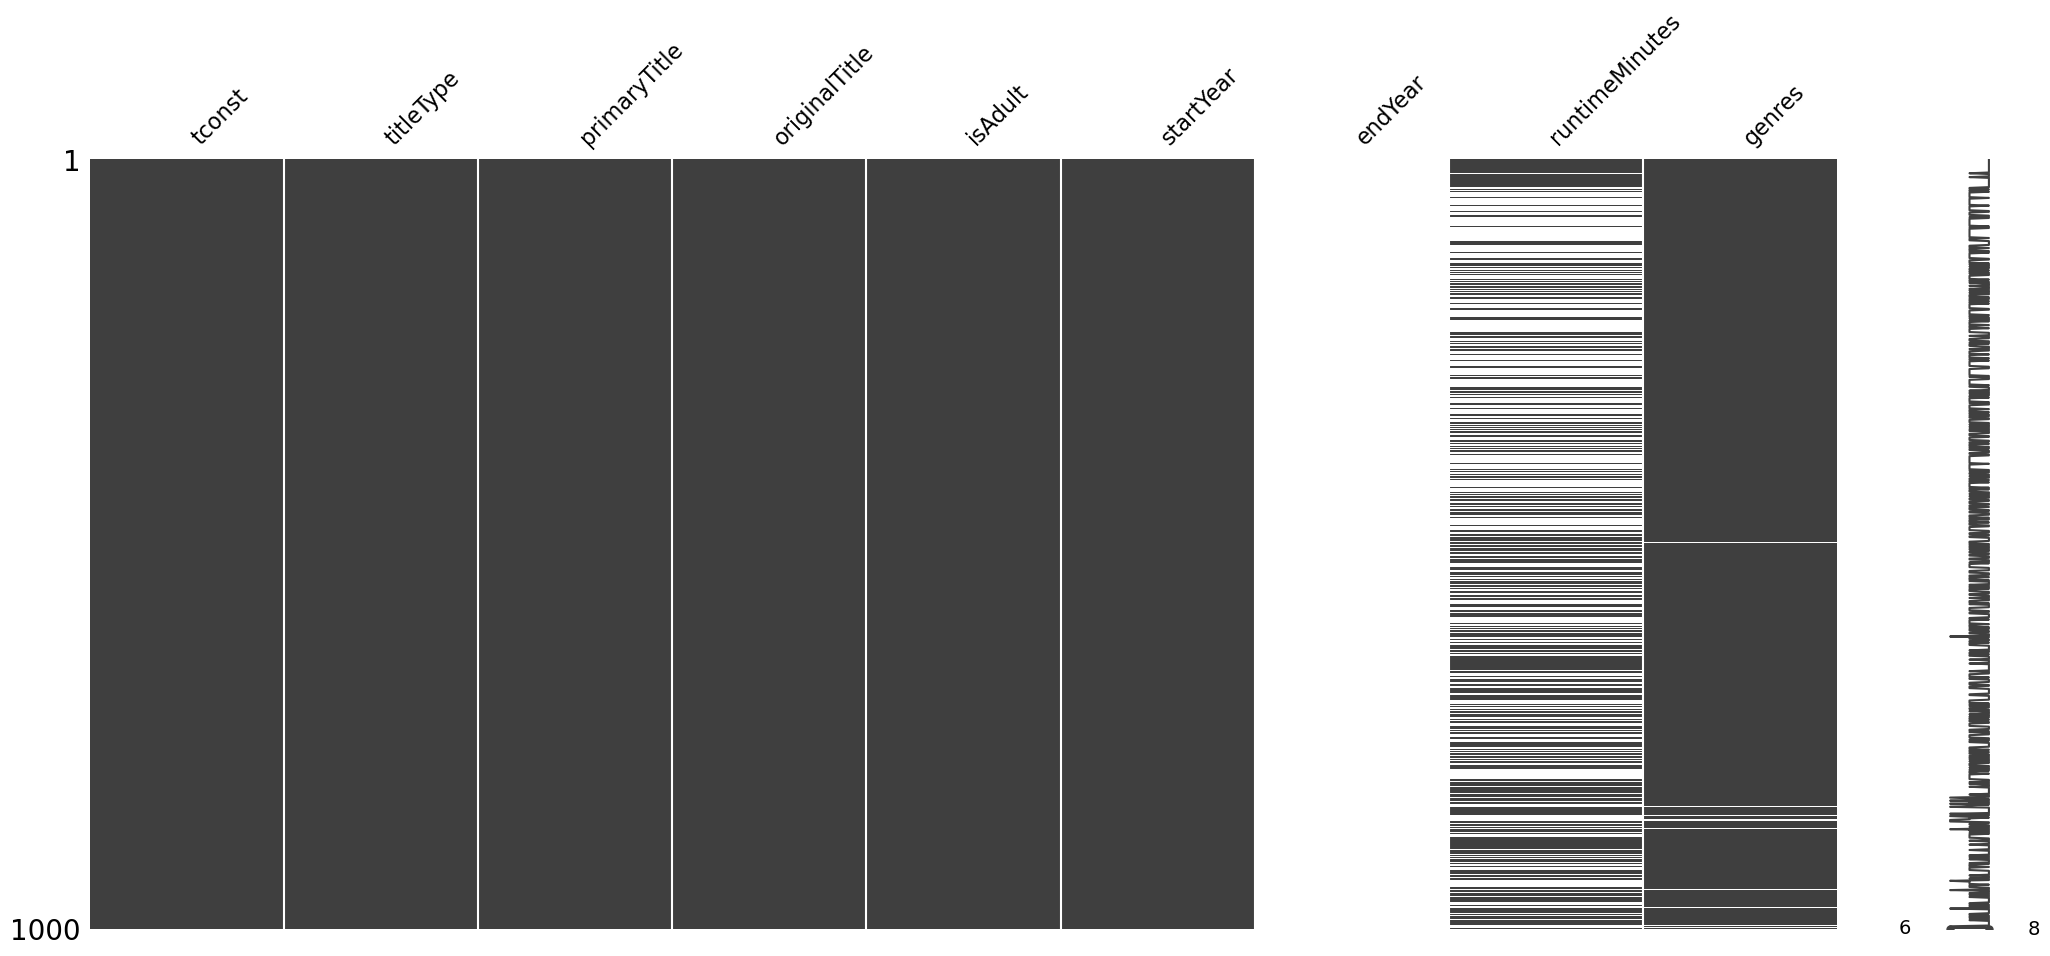

In [99]:
import missingno as msno
msno.matrix(df_t_basics)

In [138]:
df_t_basics.isnull().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

In [152]:
#Etape 1 : Transformer en liste : 
df_t_basics['genres'] = df_t_basics['genres'].apply(lambda x: x.strip().split(',') )
# Etape2 : exploser (dans un second temps)
# df_t_basics = df_t_basics.explode('genres')

In [153]:
df_t_basics['startYear'] = df_t_basics['startYear'].replace('\\N', np.nan)
df_t_basics['endYear'] = df_t_basics['endYear'].replace('\\N', np.nan)
df_t_basics['runtimeMinutes'] = df_t_basics['runtimeMinutes'].replace('\\N', np.nan)
df_t_basics['genres'] = df_t_basics['genres'].replace('\\N', np.nan)

C:\Users\ibtis\AppData\Local\Temp\ipykernel_31784\2627006143.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_t_basics['endYear'] = df_t_basics['endYear'].replace('\\N', np.nan)


In [155]:
df_t_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"[Documentary, Short]"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"[Animation, Short]"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,NaN,5,"[Animation, Comedy, Romance]"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"[Animation, Short]"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"[Comedy, Short]"


In [154]:
df_t_basics.isnull().sum()

tconst               0
titleType            0
primaryTitle         0
originalTitle        0
isAdult              0
startYear            1
endYear           1000
runtimeMinutes     512
genres               0
dtype: int64

In [ ]:
# pour afficher les lignes où la coli=onne runtime est nulle
df_t_basics[df_t_basics['runtimeMinutes'].isnull()]


In [ ]:
# OBSERVATION !!
# df_t_basics['startYear'] ==> réflexion à faire comment traiter les lignes de films dont la colonne StartYear est vide.

In [ ]:
from datetime import datetime

df_t_basics['startYearNew']= pd.to_datetime(df_t_basics['startYear'], format = '%Y')

# Le code semble correcte mais bloqué par la seule ligne où df_t_basics['startYear'] est vide (NaN)


In [ ]:
# df_t_basics['startYear'] ==> Date  ==> réflexion si changement de date en valeur ou l'exploiter pour le moment en str
# df_t_basics['endYear'] ==> Date  ==> Idem (à voir)
# df_t_basics['runtimeMinutes'] ==> Int
# df_t_basics['genres'] ==> Liste

In [141]:
df_t_basics['runtimeMinutes']= df_t_basics['runtimeMinutes'].astype(float)

In [142]:
df_t_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1000 non-null   object 
 1   titleType       1000 non-null   object 
 2   primaryTitle    1000 non-null   object 
 3   originalTitle   1000 non-null   object 
 4   isAdult         1000 non-null   int64  
 5   startYear       999 non-null    object 
 6   endYear         0 non-null      float64
 7   runtimeMinutes  488 non-null    float64
 8   genres          984 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [ ]:
# A VOIR SI CA PEUT SERVIR AUQUEL CAS LE CORRIGER

# def NaNRunTime(x):
#     if x != 'NaN':
#         x = x.astype(float)
#     else:
#         x = 'NaN'
# df_t_basics['runtimeMinutes']= df_t_basics['runtimeMinutes'].apply(NaNRunTime)



# OU? # def NaNRunTime(x):
# #     if x != 'NaN':
# #         x = int(x)
# #     else:
# #         x = 'NaN'